# Simple HRNet
This is a light Google Colab notebook showing how to use the [simple-HRNet](https://github.com/stefanopini/simple-HRNet) repository.

It includes the conversion to TensorRT and a test of the converted model.
Please skip the section "TensorRT" if not interested.

Initial idea of running on Google Colab by @basicvisual, initial implementation by @wuyenlin (see [issue #84](https://github.com/stefanopini/simple-HRNet/issues/84)).

## Pytorch

### Clone the repo and install the dependencies

In [1]:
# clone the repo
!git clone https://github.com/stefanopini/simple-HRNet.git

Cloning into 'simple-HRNet'...
remote: Enumerating objects: 420, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 420 (delta 100), reused 89 (delta 89), pack-reused 295 (from 1)
Receiving objects: 100% (420/420), 78.05 MiB | 16.12 MiB/s, done.
Resolving deltas: 100% (216/216), done.


In [2]:
%cd simple-HRNet
!pwd

/content/simple-HRNet
/content/simple-HRNet


In [3]:
# install requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# install vlc to get video codecs
!apt install vlc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-freefont-ttf liba52-0.7.4 libaa1 libaribb24-0 libcddb2 libdca0
  libdvbpsi10 libdvdnav4 libdvdread8 libebml5 libevdev2 libfaad2
  libgudev-1.0-0 libidn12 libinput-bin libinput10 libixml10 libjansson4
  libkate1 libldb2 liblirc-client0 liblua5.2-0 libmad0 libmatroska7 libmd4c0
  libmpcdec6 libmpeg2-4 libmtdev1 libmtp-common libmtp-runtime libmtp9
  libnfs13 libnotify4 libopenmpt-modplug1 libplacebo192 libprotobuf-lite23
  libproxy-tools libproxy1v5 libqt5core5a libqt5dbus5 libqt5gui5
  libqt5network5 libqt5svg5 libqt5widgets5 libqt5x11extras5
  libresid-builder0c2a libsdl-image1.2 libsdl1.2debian libsecret-1-0
  libsecret-common libshout3 libsidplay2 libsmbclient libspatialaudio0
  libspeexdsp1 libtag1v5 libtag1v5-vanilla libtalloc2 libtdb1 libtevent0
  libudev1 libupnp13 libva-wayland2 libvlc-bin libvlc5 libvlccore9
  libvncclient

### Add yolov3
Clone yolov3 for multiprocessing support. This can be skipped for single-person applications or if you plan to use YOLO v5 by Ultralytics.

In [5]:
# download git submodules
!git submodule update --init --recursive

Submodule 'models/detectors/yolo' (https://github.com/eriklindernoren/PyTorch-YOLOv3) registered for path 'models_/detectors/yolo'
Cloning into '/content/simple-HRNet/models_/detectors/yolo'...
Submodule path 'models_/detectors/yolo': checked out '47b7c912877ca69db35b8af3a38d6522681b3bb3'


In [6]:
%cd /content/simple-HRNet/models_/detectors/yolo
!pip install -q -r requirements.txt

%cd /content/simple-HRNet

/content/simple-HRNet/models_/detectors/yolo
/content/simple-HRNet


In [7]:
%cd /content/simple-HRNet/models_/detectors/yolo/weights
!sh download_weights.sh

%cd /content/simple-HRNet

/content/simple-HRNet/models_/detectors/yolo/weights
--2025-06-12 06:40:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3030::ac43:b9c7, ...
Connecting to pjreddie.com (pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3.weights’

yolov3.weights          [ <=>                ]   8.88K  --.-KB/s    in 0s      

2025-06-12 06:40:51 (90.1 MB/s) - ‘yolov3.weights’ saved [9093]

--2025-06-12 06:40:51--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3030::ac43:b9c7, ...
Connecting to pjreddie.com (pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights     [ <=>                ]   8.88K  --.-KB/s    in 

### Download HRNet pre-trained weights and test video

Download any of the supported official weights listed [here](https://github.com/stefanopini/simple-HRNet/#installation-instructions).

In the following, we download the weights `pose_hrnet_w48_384x288.pth` from the official Drive link.
Download of other weights (e.g. `pose_hrnet_w32_256x192.pth`) as well as weights from private Drives is supported too.

In [8]:
!pip install --upgrade --no-cache-dir gdown

In [9]:
# download weights

# create weights folder
%cd /content/simple-HRNet
!mkdir weights
%cd /content/simple-HRNet/weights

# download weights pose_hrnet_w48_384x288.pth
!gdown 1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS

# download weights pose_hrnet_w32_256x192.pth
!gdown 1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38

# download weights pose_hrnet_w32_256x256.pth
!gdown 1_wn2ifmoQprBrFvUCDedjPON4Y6jsN-v

# # download weights from your own Google Drive
# from glob import glob
# from google.colab import drive
# drive.mount('/content/drive')
# w_list = glob("/content/drive/<your drive folder>/*.pth")
# if not w_list:
#   raise FileNotFoundError("You haven't downloaded any pre-trained weights!")

%cd /content/simple-HRNet

/content/simple-HRNet
/content/simple-HRNet/weights
Downloading...
From (original): https://drive.google.com/uc?id=1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS
From (redirected): https://drive.google.com/uc?id=1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS&confirm=t&uuid=73abf5b2-eeae-4e2a-a67a-152fa0c3d4d8
To: /content/simple-HRNet/weights/pose_hrnet_w48_384x288.pth
100% 255M/255M [00:07<00:00, 34.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38
From (redirected): https://drive.google.com/uc?id=1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38&confirm=t&uuid=c3906ce4-8cea-4ee3-978f-e19582982670
To: /content/simple-HRNet/weights/pose_hrnet_w32_256x192.pth
100% 115M/115M [00:02<00:00, 47.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_wn2ifmoQprBrFvUCDedjPON4Y6jsN-v
From (redirected): https://drive.google.com/uc?id=1_wn2ifmoQprBrFvUCDedjPON4Y6jsN-v&confirm=t&uuid=d83f8225-3be4-4a9f-8410-2383328f883e
To: /content/simple-HRNet/weights/pose_hrnet_w32_

In [ ]:
# download a publicly available video (or just get your own)
!wget https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/WeAreGoingOnBullrun.mp4

### Test the API


In [12]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from skimage import io
from PIL import Image
from SimpleHRNet import SimpleHRNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # singleperson, COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", multiperson=False, device=device)

# # multiperson w/ YOLOv3, COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", device=device)

# # multiperson w/ YOLOv3, COCO weights, small model
# model = SimpleHRNet(32, 17, "./weights/pose_hrnet_w32_256x192.pth", device=device)

# # multiperson w/ YOLOv3, MPII weights
# model = SimpleHRNet(32, 16, "./weights/pose_hrnet_w32_256x256.pth", device=device)

# # multiperson w/ YOLOv5 (medium), COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", yolo_version='v5', yolo_model_def='yolov5m', device=device)

# multiperson w/ YOLOv5 nano, COCO weights, small model
model = SimpleHRNet(32, 17, "./weights/pose_hrnet_w32_256x192.pth", yolo_version='v5', yolo_model_def='yolov5n', device=device)
from google.colab import files
uploaded = files.upload()
image = io.imread("peaceful-boy-showing-crossed-arms.jpg")



# url = 'peaceful-boy-showing-crossed-arms.jpg'
# im = Image.open(requests.get(url, stream=True).raw)
# image = io.imread(url)

joints = model.predict(image)

device: 'cuda' - 1 GPU(s) will be used


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-6-12 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


Saving peaceful-boy-showing-crossed-arms.jpg to peaceful-boy-showing-crossed-arms (1).jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


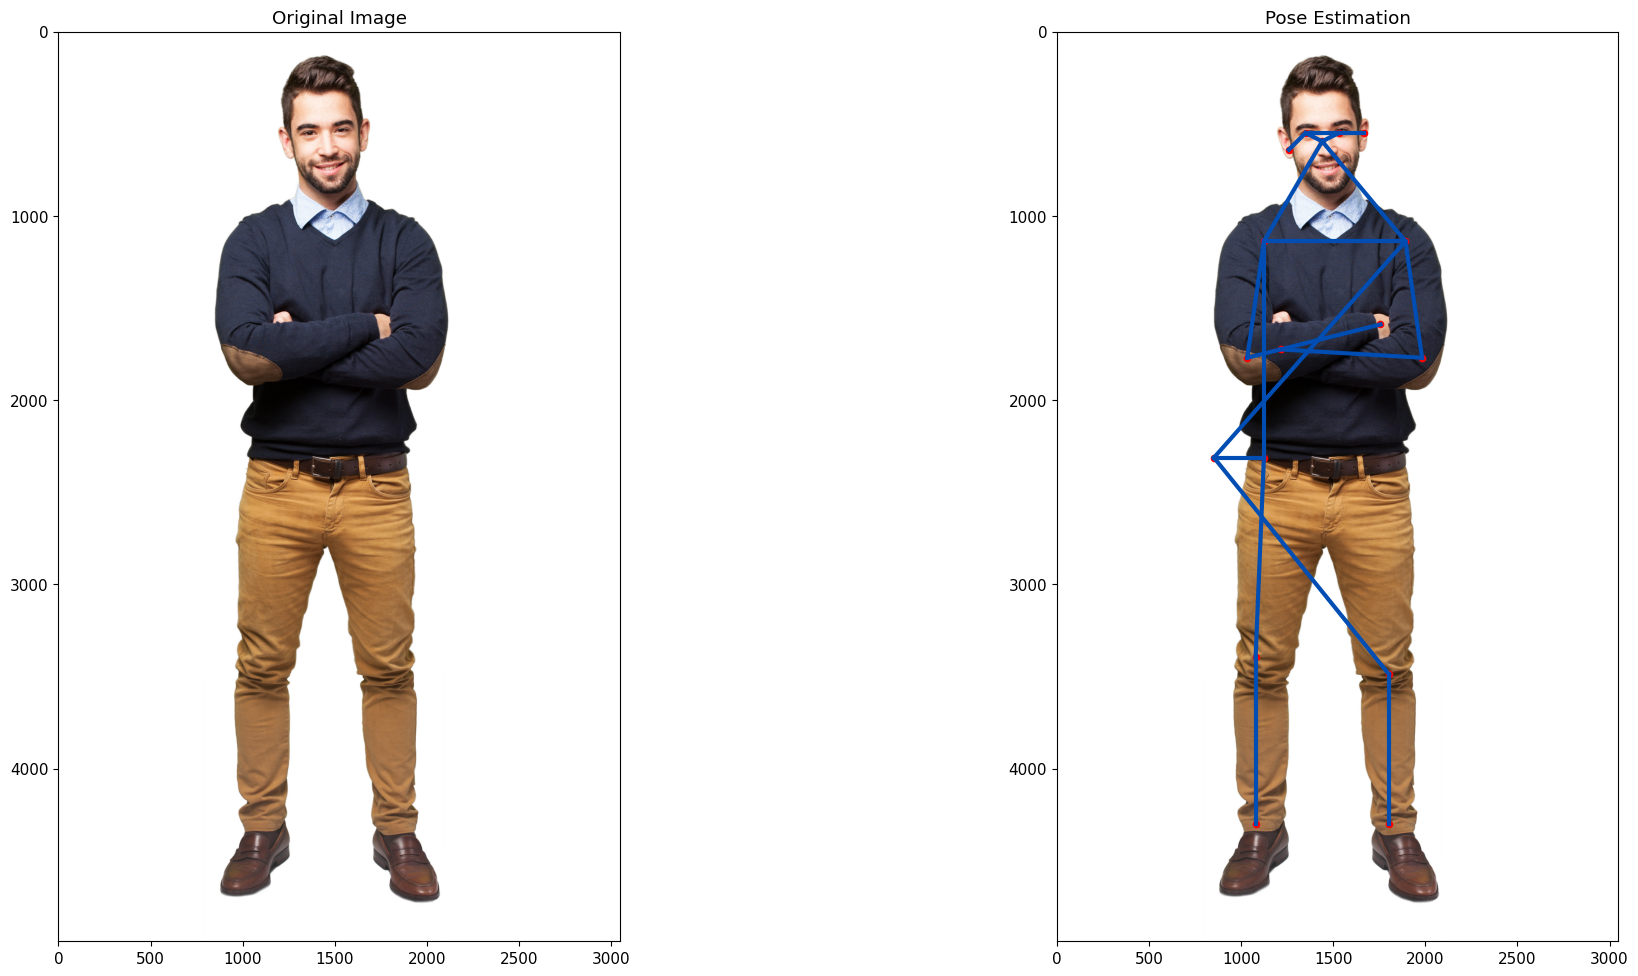

In [14]:
# %matplotlib inline
# from misc.visualization import joints_dict

# def plot_joints(ax, output):
#     bones = joints_dict()["coco"]["skeleton"]
#     # bones = joints_dict()["mpii"]["skeleton"]

#     for bone in bones:
#         xS = [output[:,bone[0],1], output[:,bone[1],1]]
#         yS = [output[:,bone[0],0], output[:,bone[1],0]]
#         ax.plot(xS, yS, linewidth=3, c=(0,0.3,0.7))
#     ax.scatter(joints[:,:,1],joints[:,:,0], s=20, c='r')

# fig = plt.figure(figsize=(60/2.54, 30/2.54))
# ax = fig.add_subplot(121)
# ax.imshow(Image.open(requests.get(url, stream=True).raw))
# ax = fig.add_subplot(122)
# ax.imshow(Image.open(requests.get(url, stream=True).raw))
# plot_joints(ax, joints)
# plt.show()
%matplotlib inline
from misc.visualization import joints_dict
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load local image (previously uploaded via files.upload())
img_path = "peaceful-boy-showing-crossed-arms.jpg"
img = Image.open(img_path)  # Load once to reuse

# Step 2: Define joint plotting function
def plot_joints(ax, output):
    bones = joints_dict()["coco"]["skeleton"]
    for bone in bones:
        xS = [output[:, bone[0], 1], output[:, bone[1], 1]]
        yS = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(xS, yS, linewidth=3, c=(0, 0.3, 0.7))
    ax.scatter(output[:, :, 1], output[:, :, 0], s=20, c='r')  # Scatter uses (x, y)

# Step 3: Plot original and joint-overlayed image
fig = plt.figure(figsize=(60 / 2.54, 30 / 2.54))

# Original image
ax = fig.add_subplot(121)
ax.imshow(img)
ax.set_title("Original Image")

# Image with joints
ax = fig.add_subplot(122)
ax.imshow(img)
plot_joints(ax, joints)
ax.set_title("Pose Estimation")

plt.show()


In [19]:
!mkdir -p coco/images
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip -q val2017.zip -d coco/images


--2025-06-12 07:35:07--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.179.187, 52.217.117.209, 3.5.30.106, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.179.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  9.14MB/s    in 71s     

2025-06-12 07:36:19 (10.9 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [21]:
!mkdir -p coco/annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q annotations_trainval2017.zip -d coco


--2025-06-12 07:37:04--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.30.85, 54.231.140.177, 16.182.36.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.30.85|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip.1’

annotations_trainva 100%[===================>] 241.19M  2.43MB/s    in 69s     

2025-06-12 07:38:14 (3.50 MB/s) - ‘annotations_trainval2017.zip.1’ saved [252907541/252907541]

replace coco/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
replace coco/annotations/instances_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace coco/annotations/captions_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace coco/annotations/captions_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace coco/annotations/person_k

In [25]:
!ls coco/annotations
!ls coco/images


captions_train2017.json   instances_val2017.json
captions_val2017.json	  person_keypoints_train2017.json
instances_train2017.json  person_keypoints_val2017.json
val2017


device: 'cuda' - 1 GPU(s) will be used


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-6-12 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


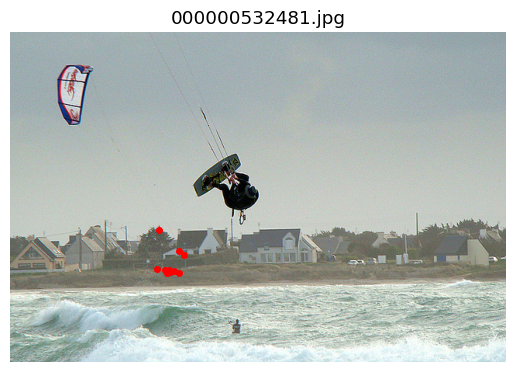

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


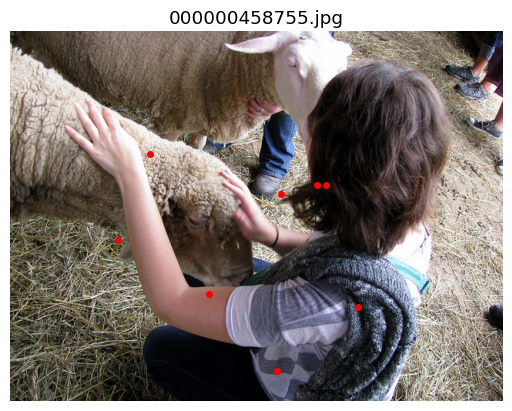

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


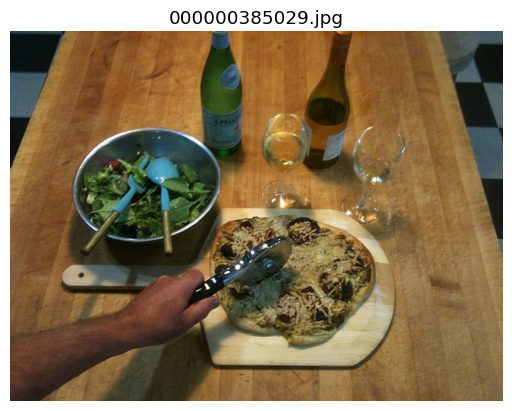

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


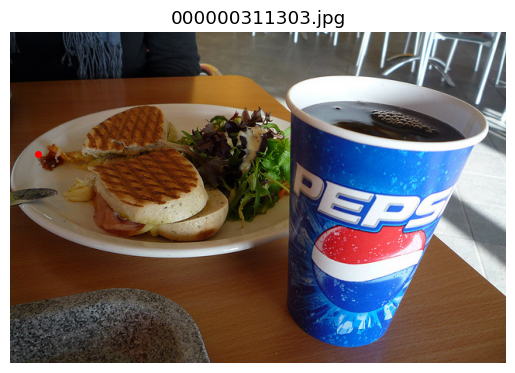

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


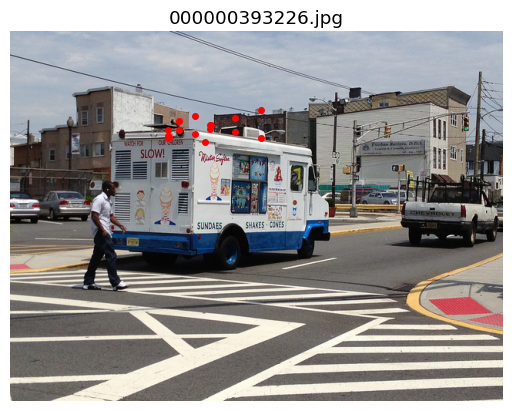

In [39]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from skimage import io
from pycocotools.coco import COCO
from SimpleHRNet import SimpleHRNet

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load HRNet model
model = SimpleHRNet(
    32, 17,
    "./weights/pose_hrnet_w32_256x192.pth",
    yolo_version='v5',
    yolo_model_def='yolov5n',
    device=device
)

# COCO annotations
ann_file = "coco/annotations/person_keypoints_val2017.json"
val_images_path = "coco/images/val2017"

# Load annotations
coco = COCO(ann_file)

# Get image IDs that contain at least one person
person_category_id = coco.getCatIds(catNms=['person'])[0]
img_ids_with_person = coco.getImgIds(catIds=[person_category_id])

# Process and visualize predictions for the first 5 such images
for img_id in img_ids_with_person[:5]:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(val_images_path, img_info['file_name'])

    # Read image properly
    image = cv2.imread(img_path)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run prediction
    results = model.predict(image)

    # Plot the image and keypoints
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title(img_info['file_name'])

    for person in results:
        for x, y, conf in person:
            if conf > 0.3:  # confidence threshold
                ax.plot(x, y, 'ro', markersize=4)

    plt.axis('off')
    plt.show()


device: 'cuda' - 1 GPU(s) will be used


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-6-12 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common

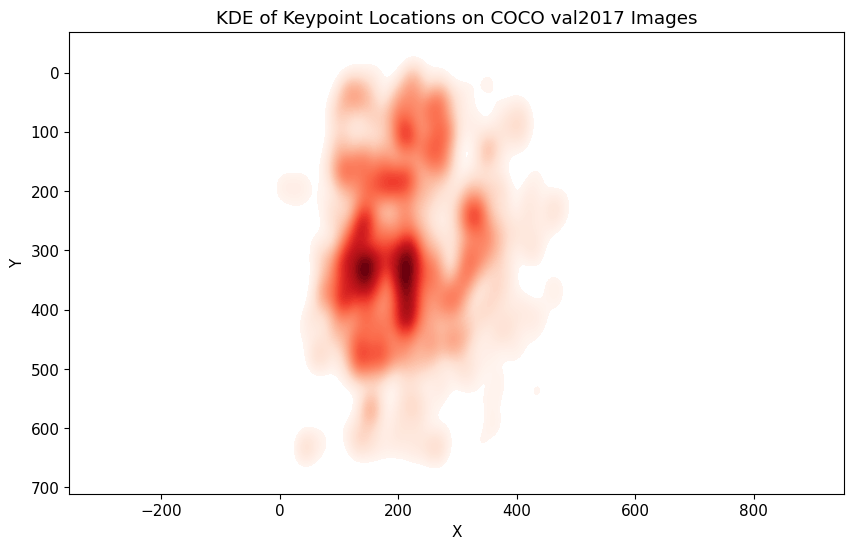

In [29]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from skimage import io
from SimpleHRNet import SimpleHRNet

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load HRNet model
model = SimpleHRNet(
    32, 17,
    "./weights/pose_hrnet_w32_256x192.pth",
    yolo_version='v5',
    yolo_model_def='yolov5n',
    device=device
)

# Path to COCO validation images
val_images_path = "coco/images/val2017"
image_files = sorted([f for f in os.listdir(val_images_path) if f.endswith('.jpg')])

# Lists to store all keypoints
all_x = []
all_y = []

# Predict on N images
N = 50  # Increase for more robust KDE
for img_file in image_files[:N]:
    img_path = os.path.join(val_images_path, img_file)
    image = io.imread(img_path)

    # Get keypoints
    predictions = model.predict(image)

    for person in predictions:
        for x, y, conf in person:
            if conf > 0.3:
                all_x.append(x)
                all_y.append(y)

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x=all_x, y=all_y, fill=True, cmap="Reds", bw_adjust=0.5, levels=100, thresh=0.05)
plt.title("KDE of Keypoint Locations on COCO val2017 Images")
plt.gca().invert_yaxis()  # Images have origin at top-left
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()


In [35]:
from tqdm import tqdm
from pycocotools.coco import COCO
import os
import cv2
import json

val_dir = "coco/images/val2017"
ann_file = "coco/annotations/person_keypoints_val2017.json"
coco = COCO(ann_file)

results = []

for img_id in tqdm(coco.getImgIds()):
    img_info = coco.loadImgs(img_id)[0]
    file_name = img_info["file_name"]
    img_path = os.path.join(val_dir, file_name)

    # ✅ Properly read image
    image = cv2.imread(img_path)
    if image is None:
        continue  # skip broken image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    try:
        people = model.predict(image)
    except Exception as e:
        print(f"Error predicting {img_path}: {e}")
        continue

    for person in people:
        keypoints = []
        for x, y, conf in person:
            keypoints.extend([float(x), float(y), 2 if conf > 0.2 else 1])

        results.append({
            "image_id": img_id,
            "category_id": 1,
            "keypoints": keypoints,
            "score": float(sum(p[2] for p in person) / len(person))
        })

# Save results
with open("predictions.json", "w") as f:
    json.dump(results, f)


loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


Streaming output truncated to the last 5000 lines.
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
 50%|█████     | 2502/5000 [02:20<02:33, 16.28it/s]/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
 50%|█████     | 2504/5000 [02:20<02:51, 14.57it/s]/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda

In [36]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Load COCO ground truth
coco_gt = COCO("coco/annotations/person_keypoints_val2017.json")

# Load your predictions
coco_dt = coco_gt.loadRes("predictions.json")

# Evaluate
coco_eval = COCOeval(coco_gt, coco_dt, iouType='keypoints')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()


loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=2.95s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | ma

In [37]:
print(len(results))  # Should be > 0
print(results[0])    # Show sample prediction


6921
{'image_id': 397133, 'category_id': 1, 'keypoints': [89.25, 427.6944580078125, 2, 89.25, 433.4166564941406, 2, 115.125, 496.3611145019531, 2, 112.25, 479.1944580078125, 2, 118.0, 496.3611145019531, 2, 132.375, 473.47222900390625, 2, 106.5, 390.5, 2, 172.625, 490.6388854980469, 2, 175.5, 490.6388854980469, 2, 184.125, 473.47222900390625, 2, 184.125, 473.47222900390625, 2, 201.375, 390.5, 2, 204.25, 390.5, 2, 261.75, 404.8055419921875, 2, 261.75, 464.8888854980469, 2, 322.125, 396.22222900390625, 2, 313.5, 459.1666564941406, 2], 'score': 0.3917858898639679}


### Test the live script
This step can be skipped if interested in the TensorRT conversion.

In [ ]:
# # test the live script with default params (multiperson with yolo v3)
# !python ./scripts/live-demo.py --filename WeAreGoingOnBullrun.mp4 --save_video

# # test the live script with tiny yolo (v3)
# !python ./scripts/live-demo.py --filename WeAreGoingOnBullrun.mp4 --save_video --use_tiny_yolo

# # test the live script with yolo v5
# !python ./scripts/live-demo.py --filename WeAreGoingOnBullrun.mp4 --save_video --yolo_version v5

# test the live script with tiny yolo v5 (tensorrt yolo v5)
!python ./scripts/live-demo.py --filename WeAreGoingOnBullrun.mp4 --save_video --yolo_version v5 --use_tiny_yolo

Now check out the video output.avi


## TensorRT
This section install TensorRT 8.5, converts the model to TensorRT (.engine) and tests the converted model.

Tested with TensorRT 8.5.1-1+cuda11.8 and python package tensorrt 8.5.1.7 .

### Install TensorRT
A GPU is needed for this step. Please change the runtime type to "GPU".


In [ ]:
# check a GPU runtime is selected
!nvidia-smi

In [ ]:
%%bash
wget https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb

dpkg -i nvidia-machine-learning-repo-*.deb
apt-get update

sudo apt-get install libnvinfer8 python3-libnvinfer

In [ ]:
# check TensorRT version
print("TensorRT version: ")
!dpkg -l | grep nvinfer

In [ ]:
# install TensorRT for python
!pip install tensorrt

In [ ]:
# clone the converion tool torch2trt
%cd /content
!git clone https://github.com/NVIDIA-AI-IOT/torch2trt

In [ ]:
# install torch2trt
%cd /content/torch2trt
!python setup.py install

In [ ]:
%cd /content/simple-HRNet

### Export the model with tensorrt

In [ ]:
# Convert the smaller HRNet model to TensorRT - it may take a while...
!python scripts/export-tensorrt-model.py --half \
     --weights "./weights/pose_hrnet_w32_256x192.pth" --hrnet_c 32 --image_resolution '(256, 192)'

#### [Optional] Export yolov5 with TensorRT

In [ ]:
# Optional - Convert yolov5 (nano) to tensorrt too
!python /root/.cache/torch/hub/ultralytics_yolov5_master/export.py --weights yolov5n.pt --include engine --device 0 --half

### Test the tensorrt model

In [ ]:
# Run inference with the converted TensorRT model
!python scripts/live-demo.py --enable_tensorrt --filename=WeAreGoingOnBullrun.mp4 --hrnet_weights='weights/hrnet_trt.engine' \
  --hrnet_c 32 --image_resolution "(256, 192)" --yolo_version v5 --use_tiny_yolo --save_video


Now check out the video output.avi
